In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Sample Dataset (Replace with your actual dataset)
data = pd.DataFrame({
    'class': ['First', 'Third', 'Third', 'First', 'First', 'Third'],
    'sex': ['female', 'female', 'female', 'male', 'male', 'male'],
    'age': [38, 26, 18, 28, 28, 21],
    'target': [1, 0, 0, 1, 1, 0]  # Example labels (Survived: 1, Not Survived: 0)
})

# Splitting into train/test sets
X = data[['class', 'sex', 'age']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
X_train

,class,sex,age
5,Third,male,21
2,Third,female,18
4,First,male,28
3,First,male,28


In [7]:
X_test

,class,sex,age
0,First,female,38
1,Third,female,26


X_test_transformed     class
0  First
1  Third
Prediction  class  : [1 0]
probabilities  class  : [[0. 1.]
 [1. 0.]]
X_test_transformed        sex
0  female
1  female
Prediction  sex  : [0 0]
probabilities  sex  : [[1. 0.]
 [1. 0.]]
X_test_transformed     age
0   38
1   26
Prediction  age  : [1 1]
probabilities  age  : [[0. 1.]
 [0. 1.]]


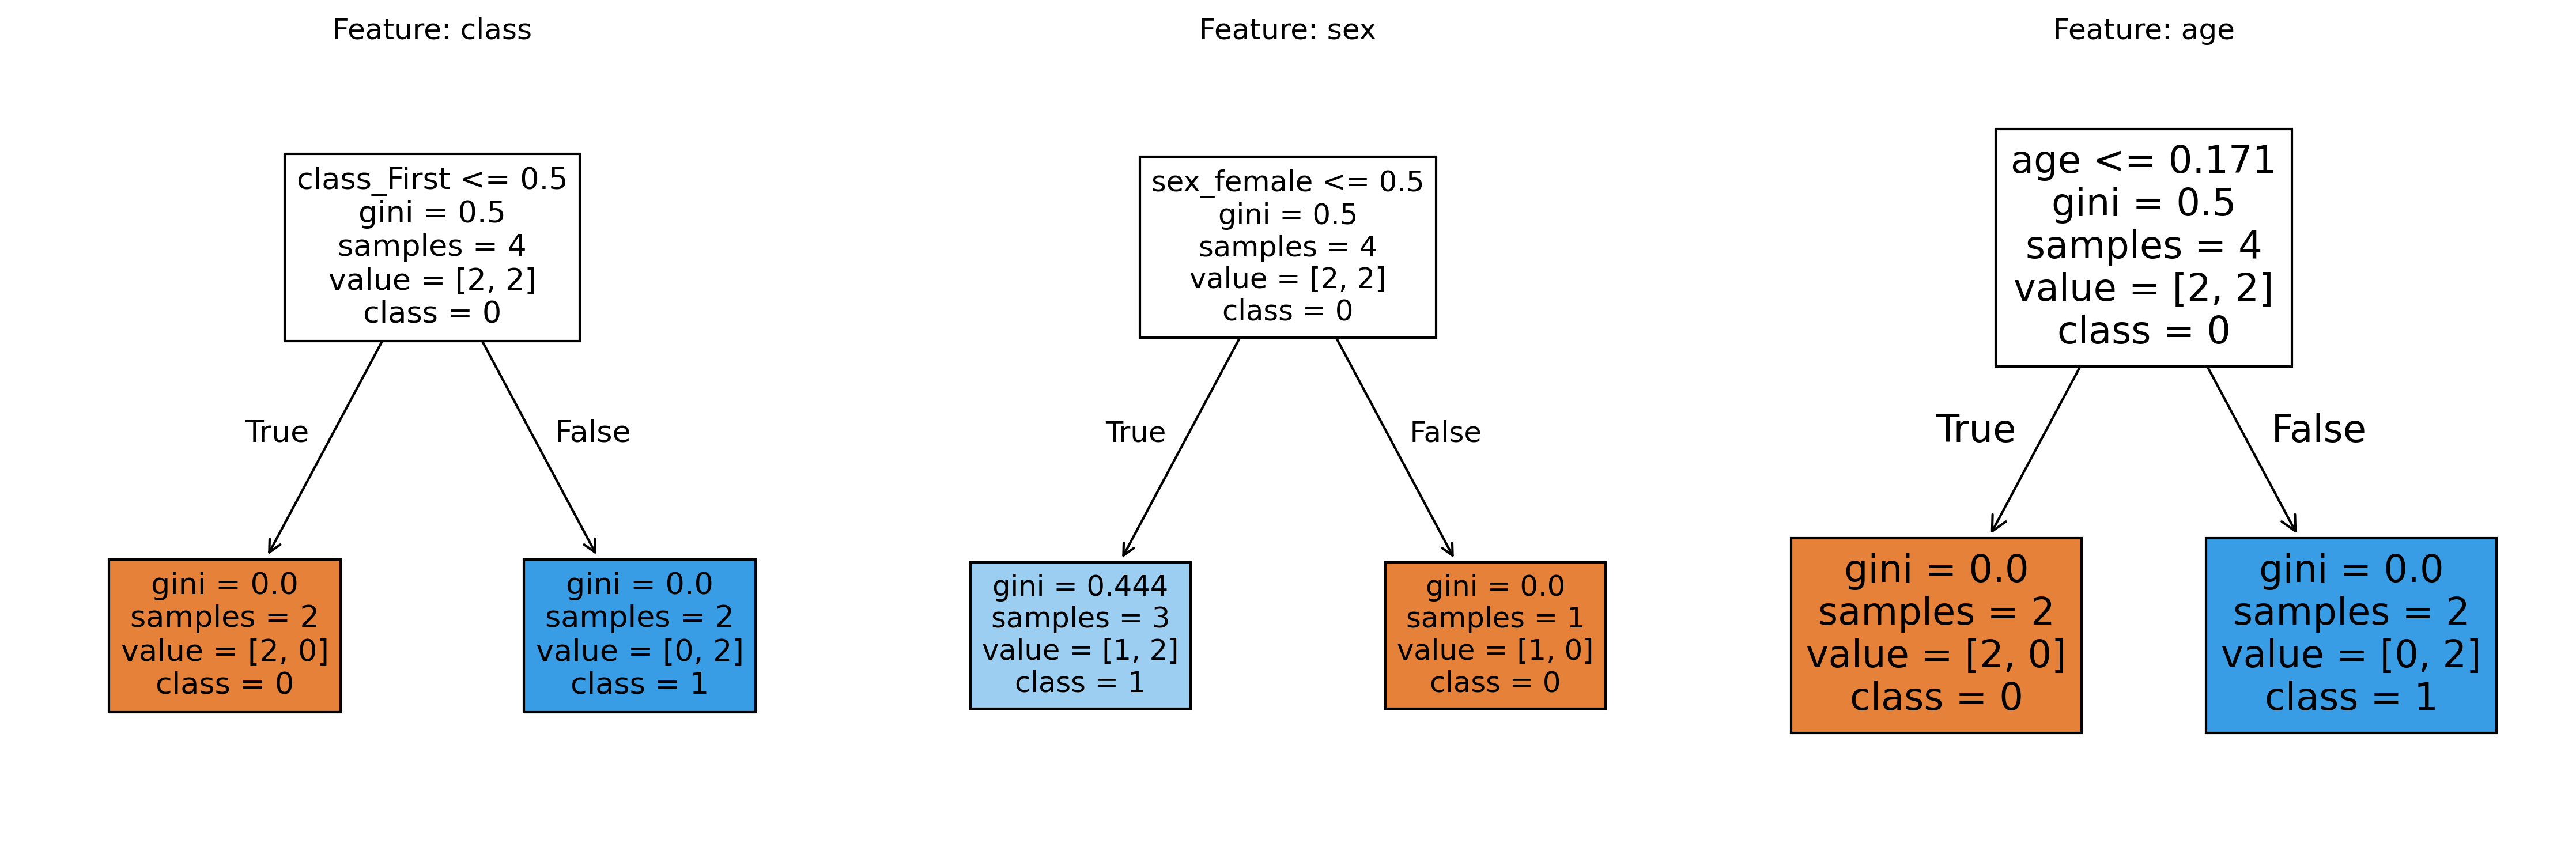


Predictions:
class: [1 0]
sex: [0 0]
age: [1 1]

Prediction Probabilities:
class:
[[0. 1.]
 [1. 0.]]
sex:
[[1. 0.]
 [1. 0.]]
age:
[[0. 1.]
 [0. 1.]]


In [15]:
# Dictionary to store models
dt = {}

# Set up figure for subplots
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=300)

# Store predictions and probabilities
predictions = {}
probabilities = {}

for i, f in enumerate(X_train.columns):
    # Determine preprocessing steps
    if X_train[f].dtype == "object":  # Categorical feature
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
    else:  # Numerical feature
        preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

    # Create pipeline with Decision Tree
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42))
    ])
    # print("X train: ", X_train[[f]])
    # Fit the model
    dt[f] = pipeline.fit(X_train[[f]], y_train)

    # Transform test data (apply only preprocessing)
    X_test_transformed = dt[f].named_steps['preprocessor'].transform(X_test[[f]])
    print("X_test_transformed ", X_test[[f]])
    # Make predictions using the classifier
    predictions[f] = dt[f].named_steps['classifier'].predict(X_test_transformed)
    probabilities[f] = dt[f].named_steps['classifier'].predict_proba(X_test_transformed)
    print("Prediction ", f , " :", predictions[f])
    print("probabilities ",f," :", probabilities[f] )

    # Extract feature names for categorical encoding
    feature_name = [f]
    if X_train[f].dtype == "object":
        feature_name = dt[f].named_steps['preprocessor'].named_steps['encoder'].get_feature_names_out([f])

    # print("feature name: ", feature_name)
    # Plot the decision tree
    plot_tree(dt[f].named_steps['classifier'], feature_names=feature_name, class_names=['0', '1'], ax=axis[i], filled=True)
    axis[i].set_title(f"Feature: {f}", fontsize=12)

plt.tight_layout()
plt.show()

# Display predictions
print("\nPredictions:")
for feature, pred in predictions.items():
    print(f"{feature}: {pred}")

# print(predictions)
# print(probabilities)
# Display prediction probabilities
print("\nPrediction Probabilities:")
for feature, prob in probabilities.items():
    print(f"{feature}:\n{prob}")